# 01 Import libraries

In [1]:
import numpy as np
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using device: {device}")

Using device: cpu


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
import pandas as pd

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
import importlib

## Import our own modules

In [6]:
import lib
importlib.reload(lib)

<module 'lib' from 'c:\\Users\\dongq\\OneDrive\\Desktop\\New results\\Learning-the-Optimal-Solution-Path\\lib\\__init__.py'>

In [7]:
from lib.fast_tensor_data_loader import FastTensorDataLoader
from lib.lsp.basis_generator import customized_jacobi
from lib.lsp.basis_tf_module import Basis_TF_SGD
from lib.lsp.solver_lsp import train_lsp, test_lsp
from lib.lsp.loss_fn_lsp import reg_unif_weighted_logit

# 02 Instantiate dataset

In [8]:
# file path for Colab. May need to change this
X_df = pd.read_csv('X_processed.csv')
y_df = pd.read_csv('y_processed.csv')

In [9]:
X = np.array(X_df)
y = np.array(y_df).squeeze()

In [10]:
input_dim = X.shape[1]

In [11]:
X_tune = X[:200, :]
y_tune = y[:200]

In [12]:
train_X = torch.tensor(X_tune, dtype=torch.float32)
train_y = torch.tensor(y_tune, dtype=torch.float32)

In [13]:
# full gradient descent uses all data points
GD_data_loader = FastTensorDataLoader(train_X, train_y, batch_size=1000, shuffle=True, )
# test data
test_data_loader = FastTensorDataLoader(train_X, train_y, batch_size=1000, shuffle=False, )

# 03 Define Functions

In [14]:
loss_fn = reg_unif_weighted_logit

In [33]:
alpha_beta=[0, 1]

In [34]:
phi_lam = customized_jacobi(alpha_beta)

In [35]:
def gen_loss_gd(lam, lr):
    model = Basis_TF_SGD(input_dim, basis_dim, phi_lam, intercept=True).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    optimizer.zero_grad()
    weight = model.linear.weight.clone().detach()
    itr = 0
    for t in range(epochs):
        grad, weight, itr = train_lsp(itr, weight, GD_data_loader, model, loss_fn,
                                      optimizer, weighted_avg=True, step_size=None,
                                      const=None, distribution='beta', alpha_beta=alpha_beta, device='cpu')

    loss = test_lsp(test_data_loader, model, loss_fn, lam, device)
    return loss

# 04 Tuning the learning rate for our model

In [18]:
lr_list = 0.5 ** np.arange(-3, 11)

In [26]:
lam = 0.7

In [20]:
epochs = 50

## Basis dimension = 5

In [36]:
basis_dim = 5

pick lr = 0.25

In [37]:
losses = []
for lr in lr_list:
    loss = gen_loss_gd(lam, lr)

    print(f"learning rate: {lr}\t loss: {loss}")
    losses.append(loss)

learning rate: 8.0	 loss: 1.702830546435294e+20
learning rate: 4.0	 loss: 66483.9453125
learning rate: 2.0	 loss: 3.5953497886657715
learning rate: 1.0	 loss: 4.779194355010986
learning rate: 0.5	 loss: 0.25323286652565
learning rate: 0.25	 loss: 0.252791166305542
learning rate: 0.125	 loss: 0.25349175930023193
learning rate: 0.0625	 loss: 0.25673243403434753
learning rate: 0.03125	 loss: 0.2662820816040039
learning rate: 0.015625	 loss: 0.28064125776290894
learning rate: 0.0078125	 loss: 0.29021012783050537
learning rate: 0.00390625	 loss: 0.29937678575515747
learning rate: 0.001953125	 loss: 0.30857551097869873
learning rate: 0.0009765625	 loss: 0.3152657747268677


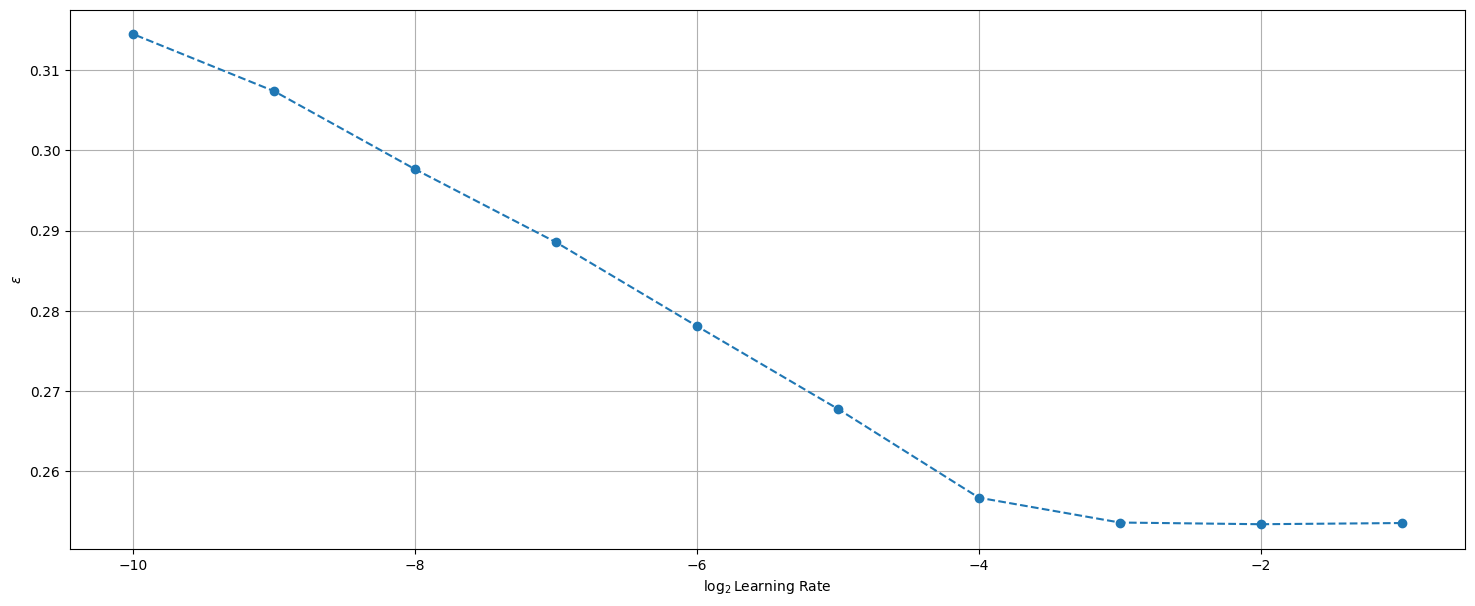

In [28]:
# plot result of our method:
plt.figure(figsize=(18,7))
plt.plot(np.log2(lr_list[4:]), losses[4:], '--o')
plt.xlabel('$\\log_2$Learning Rate')
plt.ylabel("$\\epsilon$")
plt.grid(True)

## Basis dimension = 7

In [38]:
basis_dim = 7

pick lr = 0.125

In [39]:
losses = []
for lr in lr_list:
    loss = gen_loss_gd(lam, lr)

    print(f"learning rate: {lr}\t loss: {loss}")
    losses.append(loss)

learning rate: 8.0	 loss: 2.134171420917865e+22
learning rate: 4.0	 loss: 771358.0625
learning rate: 2.0	 loss: 1.2230666875839233
learning rate: 1.0	 loss: 0.8150094151496887
learning rate: 0.5	 loss: 0.2584187984466553
learning rate: 0.25	 loss: 0.2557375133037567
learning rate: 0.125	 loss: 0.25305280089378357
learning rate: 0.0625	 loss: 0.26045140624046326
learning rate: 0.03125	 loss: 0.26602703332901
learning rate: 0.015625	 loss: 0.2783874571323395
learning rate: 0.0078125	 loss: 0.28778767585754395
learning rate: 0.00390625	 loss: 0.29982104897499084
learning rate: 0.001953125	 loss: 0.3091285824775696
learning rate: 0.0009765625	 loss: 0.3147065043449402


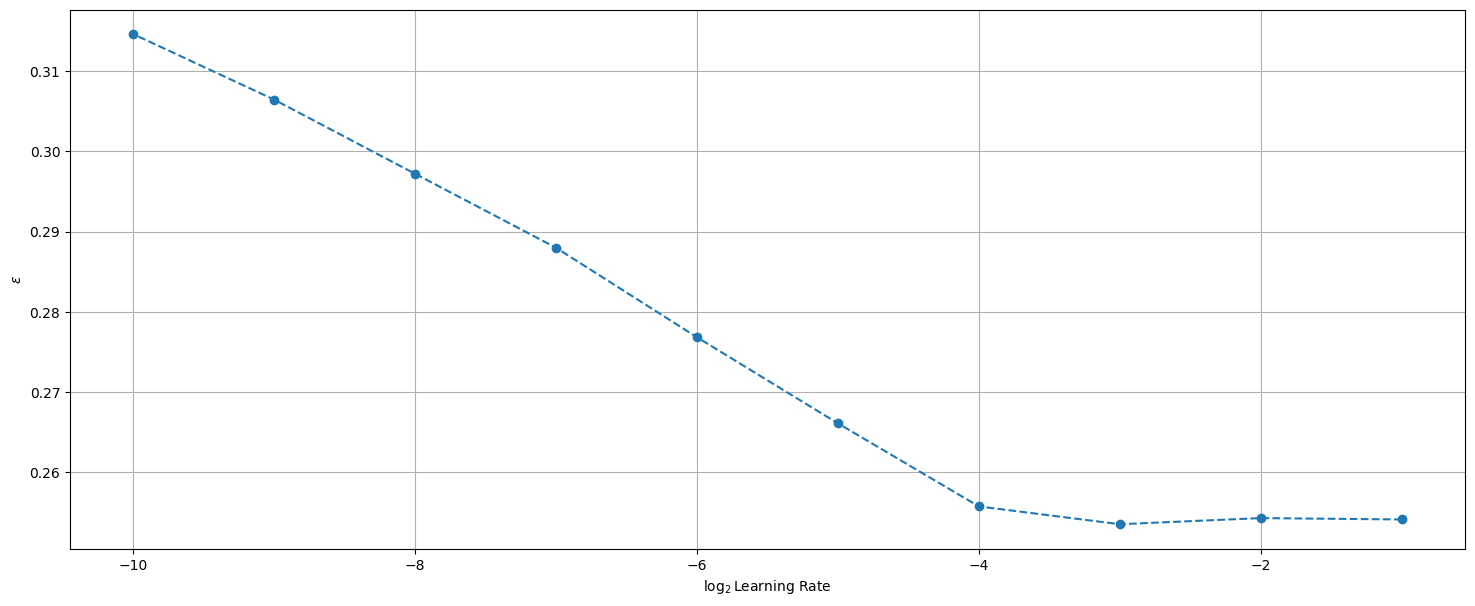

In [31]:
# plot result of our method:
plt.figure(figsize=(18,7))
plt.plot(np.log2(lr_list[4:]), losses[4:], '--o')
plt.xlabel('$\\log_2$Learning Rate')
plt.ylabel("$\\epsilon$")
plt.grid(True)

## Basis dimension = 9

In [40]:
basis_dim = 9

pick lr = 0.125

In [41]:
losses = []
for lr in lr_list:
    loss = gen_loss_gd(lam, lr)

    print(f"learning rate: {lr}\t loss: {loss}")
    losses.append(loss)

learning rate: 8.0	 loss: 6.002635297773322e+18
learning rate: 4.0	 loss: 1790.2061767578125
learning rate: 2.0	 loss: 29.79534912109375
learning rate: 1.0	 loss: 0.8967399001121521
learning rate: 0.5	 loss: 0.3728122115135193
learning rate: 0.25	 loss: 0.25985437631607056
learning rate: 0.125	 loss: 0.2529810965061188
learning rate: 0.0625	 loss: 0.25805801153182983
learning rate: 0.03125	 loss: 0.26448044180870056
learning rate: 0.015625	 loss: 0.27824392914772034
learning rate: 0.0078125	 loss: 0.28935420513153076
learning rate: 0.00390625	 loss: 0.29964715242385864
learning rate: 0.001953125	 loss: 0.30744484066963196
learning rate: 0.0009765625	 loss: 0.3147384226322174


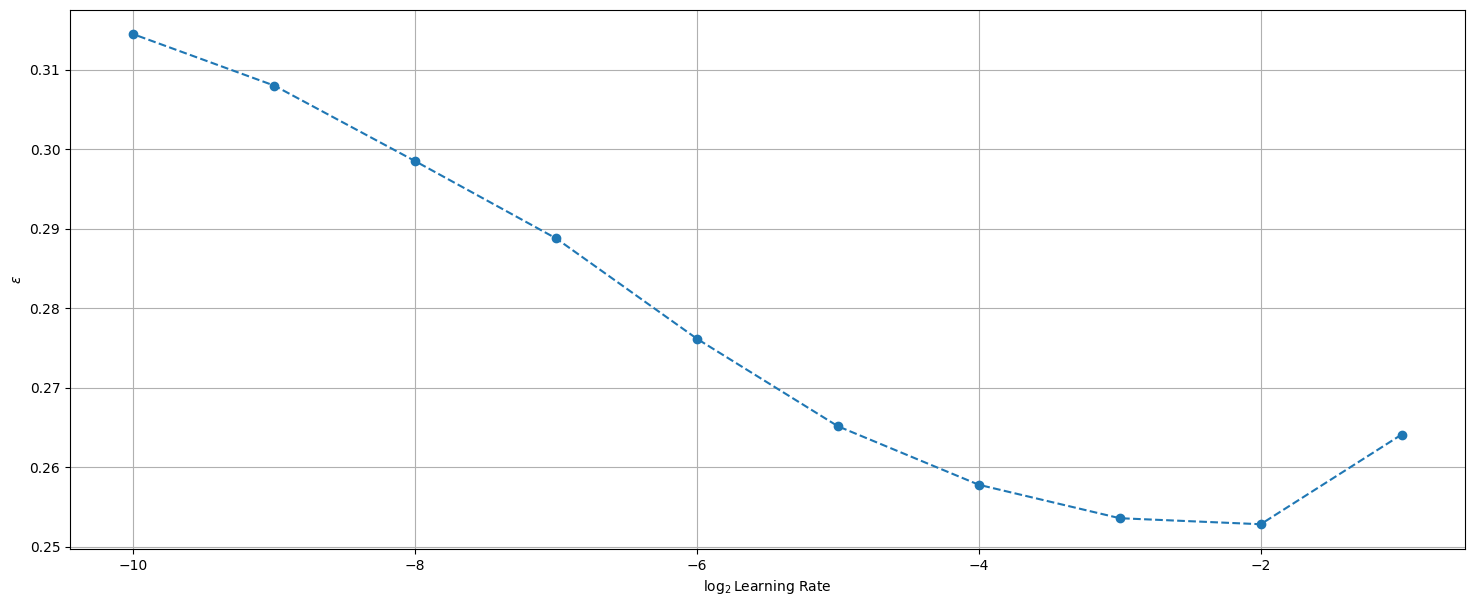

In [34]:
# plot result of our method:
plt.figure(figsize=(18,7))
plt.plot(np.log2(lr_list[4:]), losses[4:], '--o')
plt.xlabel('$\\log_2$Learning Rate')
plt.ylabel("$\\epsilon$")
plt.grid(True)